# DEEP LEARNING PROJECT-1:CONVOLUTIONAL NEURAL NETWORKS

IMPORTING REQUIRED LIBRARIES

In [1]:
import torch
import utils
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
from torchvision import datasets, transforms

C:\Users\Thirulok Sundar\anaconda3\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: Could not find module 'C:\Users\Thirulok Sundar\anaconda3\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


LOADING DATA

In [2]:
transform =  transforms.Compose([transforms.ToTensor(),transforms.Resize((32,32))])
train_data = datasets.ImageFolder(root = 'C:/Users/Thirulok Sundar/Dataset/train', transform = transform)
test_data = datasets.ImageFolder(root = 'C:/Users/Thirulok Sundar/Dataset/test', transform = transform)

In [3]:
train_loader = DataLoader(train_data, batch_size= 70, shuffle=True)
test_loader = DataLoader(test_data, batch_size = 70, shuffle=True)

VISUALIZING SOME OF THE TRAINING IMAGES

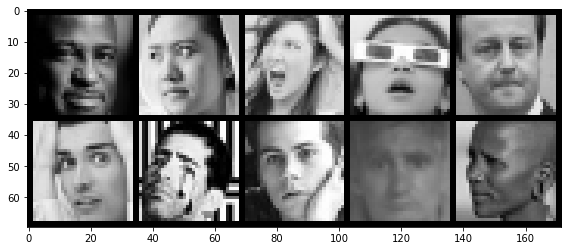

In [4]:
for images,labels in train_loader:
    break
im = make_grid(images[0:10], nrow= 5) 
plt.figure(figsize=(10,4))
plt.imshow(np.transpose(im.numpy(),(1,2,0)))


In [5]:
images.shape

torch.Size([70, 3, 32, 32])

CALCULATING THE MEAN AND STANDARD DEVIATION

In [6]:
mean= images.mean()
std= images.std()

SELECTING THE DEVICE

In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
mean = mean.to(device)
std = std.to(device)

DEFINING THE CNN NETWORK

In [8]:
class convNet(nn.Module):
    def __init__ (self):
        super().__init__()
      
        self.conv1 = nn.Conv2d(3,5,5,1)  
        self.conv2 = nn.Conv2d(5,20,3,1)         

        self.fc1 = nn.Linear(6*6*20,360)
        self.fc2 = nn.Linear(360,180)
        self.fc3 = nn.Linear(180,90)
        self.fc4 = nn.Linear(90,7)

    def forward(self,x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x,2,2)
        x = F.relu(self.conv2(x))  
        x = F.max_pool2d(x,2,2)

        x = x.view(-1,6*6*20)        

        x = F.relu(self.fc1(x))        
        x = F.relu(self.fc2(x)) 
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x),dim = 1)    
        return(x)

In [9]:
for i , (X_train,y_train) in enumerate(train_data):     
    break
x = X_train.view(-1,3,32,32)

DEFINING THE MODEL AND CHOOSING PARAMETERS

In [10]:
model = convNet().to(device)
criterion = nn.CrossEntropyLoss() 
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum = 0.8)

TRAINING THE MODEL

In [11]:
for epoch in range(80):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        inputs = (inputs-mean)/std

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 410 == 409:    # print every 410 mini-batches
            print(f'Epoch:{epoch + 1}  loss: {running_loss / 410:.3f}')
            running_loss = 0.0

print('Finished Training')

Epoch:1  loss: 1.802
Epoch:2  loss: 1.660
Epoch:3  loss: 1.577
Epoch:4  loss: 1.517
Epoch:5  loss: 1.462
Epoch:6  loss: 1.402
Epoch:7  loss: 1.347
Epoch:8  loss: 1.288
Epoch:9  loss: 1.228
Epoch:10  loss: 1.159
Epoch:11  loss: 1.090
Epoch:12  loss: 1.009
Epoch:13  loss: 0.921
Epoch:14  loss: 0.829
Epoch:15  loss: 0.747
Epoch:16  loss: 0.659
Epoch:17  loss: 0.580
Epoch:18  loss: 0.485
Epoch:19  loss: 0.456
Epoch:20  loss: 0.361
Epoch:21  loss: 0.335
Epoch:22  loss: 0.307
Epoch:23  loss: 0.267
Epoch:24  loss: 0.220
Epoch:25  loss: 0.189
Epoch:26  loss: 0.197
Epoch:27  loss: 0.154
Epoch:28  loss: 0.161
Epoch:29  loss: 0.133
Epoch:30  loss: 0.103
Epoch:31  loss: 0.126
Epoch:32  loss: 0.091
Epoch:33  loss: 0.107
Epoch:34  loss: 0.082
Epoch:35  loss: 0.065
Epoch:36  loss: 0.063
Epoch:37  loss: 0.067
Epoch:38  loss: 0.044
Epoch:39  loss: 0.049
Epoch:40  loss: 0.060
Epoch:41  loss: 0.106
Epoch:42  loss: 0.051
Epoch:43  loss: 0.054
Epoch:44  loss: 0.038
Epoch:45  loss: 0.032
Epoch:46  loss: 0.0

CHECKING ACCURACY ON THE TRAINING DATA

In [12]:
running_error = 0
num_batches = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in train_loader:
        image, label = data
        image = image.to(device)
        label = label.to(device)
        me = image.mean()
        me = mean.to(device)
        st = image.std()
        st = std.to(device)
        image = (image-me)/st
        # calculate outputs by running images through the network
        outputs = model(image)

        error = utils.get_error( outputs , label)

        running_error += error.item()

        num_batches+=1


total_error = running_error/num_batches
print( 'error rate on train set =', total_error*100 ,'percent')
print('accuracy on the train set =',(100-(total_error*100)),'percent')

error rate on train set = 0.18769514241647836 percent
accuracy on the train set = 99.81230485758353 percent


EVALUATING THE MODEL ON THE TEST SET

In [15]:
dataiter = iter(test_loader)
images, labels = dataiter.next()
images = images.to(device)
labels = labels.to(device)

In [16]:
classes = ('angry', 'disgust', 'fear', 'happy','neutral', 'sad', 'surprise')
outputs = model(images)
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  angry happy happy surprise


In [17]:
running_error = 0
num_batches = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_loader:
        image, label = data
        image = image.to(device)
        label = label.to(device)
        me = image.mean()
        me = mean.to(device)
        st = image.std()
        st = std.to(device)
        image = (image-me)/st
        # calculate outputs by running images through the network
        outputs = model(image)

        error = utils.get_error( outputs , label)

        running_error += error.item()

        num_batches+=1


total_error = running_error/num_batches
print( 'error rate on test set =', total_error*100 ,'percent')
print('accuracy on the test set =',(100-(total_error*100)),'percent')

error rate on test set = 49.607269567193335 percent
accuracy on the test set = 50.392730432806665 percent


In [18]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in test_loader:
        image, label = data
        image = image.to(device)
        label = label.to(device)
        me = image.mean()
        me = mean.to(device)
        st = image.std()
        st = std.to(device)
        image = (image-me)/st
        outputs = model(image)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

# print accuracy for each class
for classname, correct_count in correct_pred.items():
    if total_pred[classname]!=0:
        accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: angry is 16.7 %
Accuracy for class: disgust is 16.7 %
Accuracy for class: fear  is 13.3 %
Accuracy for class: happy is 26.6 %
Accuracy for class: neutral is 17.6 %
Accuracy for class: sad   is 18.2 %
Accuracy for class: surprise is 12.5 %
